In [1]:
# imports from lesson
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
# wrangled data
import wrangle
#prep data
import prepare

In [2]:
# acquired the data
df = wrangle.get_zillow17_data()
df


Let me get that for you...


,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [3]:
# prepare data (fill missing values, etc.)
df = prepare.prep_zillow17(df)
# remove outliers except (fibs)
df = prepare.remove_outliers_fibs(df, 1.5)
df

,bedrooms,bathrooms,finished_sqft,tax_value,year_built,tax_amount,fips
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
40,2.0,1.0,725.0,37548.0,1953.0,576.47,6037.0
...,...,...,...,...,...,...,...
2152815,4.0,2.0,1484.0,71859.0,1955.0,1135.72,6037.0
2152824,2.0,1.0,710.0,175319.0,1940.0,2040.78,6111.0
2152831,3.0,2.0,1194.0,271536.0,1954.0,3555.73,6037.0
2152852,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0


In [4]:
# split data into train and test
train, validate, test = prepare.split_dataframe(df)
print(train.shape)
print(validate.shape)
print(test.shape)

(1009087, 7)
(432466, 7)
(360389, 7)


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
# utilize min-max scaling on train
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit_transform(train)
# apply min-max scaling on train, validate, test
train_scaled_mm = scaler.transform(train)
validate_scaled_mm = scaler.transform(validate)
test_scaled_mm = scaler.transform(test)

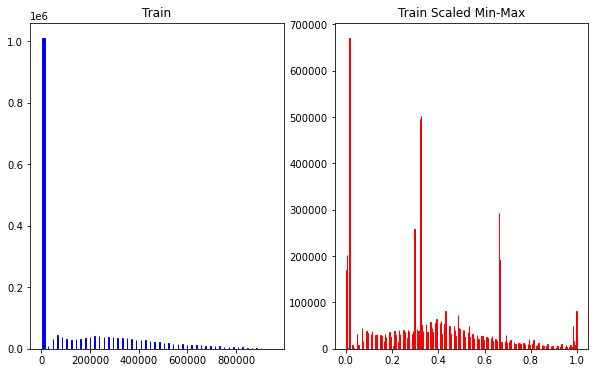

In [25]:
# visualize the data for train and train_scaled_mm for each column
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_mm, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Min-Max')
plt.show()



Min-Max scaler is used to scale the data to a range of 0 to 1. It is a good idea to scale your data to a range of 0 to 1 before you apply a classifier. This is because the classifier may not be able to handle the data range that you have scaled to. For example, if you have a classifier that is only able to handle data between 0 and 1, then you will not be able to apply it to the data that you have scaled to a range of 0 to 1.

In [7]:
# utilize standard scaling on train
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(train)
# apply standard scaling on train, validate, test
train_scaled_sd = scaler.transform(train)
validate_scaled_sd = scaler.transform(validate)
test_scaled_sd = scaler.transform(test)

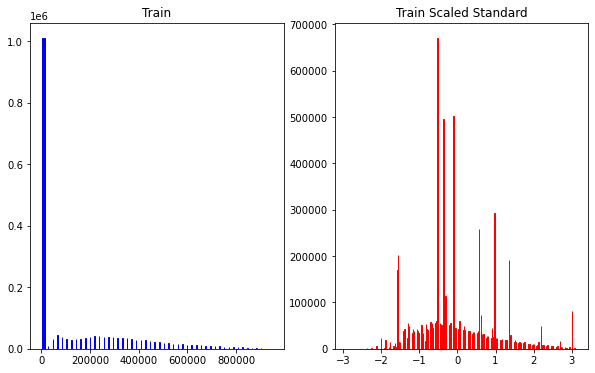

In [8]:
# visualize the data for train and train_scaled_sd
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_sd, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Standard')
plt.show()

Standard scaler is used to scale the data to a range of -1 to 1. It is recommended to use the Standard scaler for the data that is not in a range of 0 to 1.

In [9]:
# utilize Robust scaling on train
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit_transform(train)
# apply Robust scaling on train, validate, test
train_scaled_rs = scaler.transform(train)
validate_scaled_rs = scaler.transform(validate)
test_scaled_rs = scaler.transform(test)

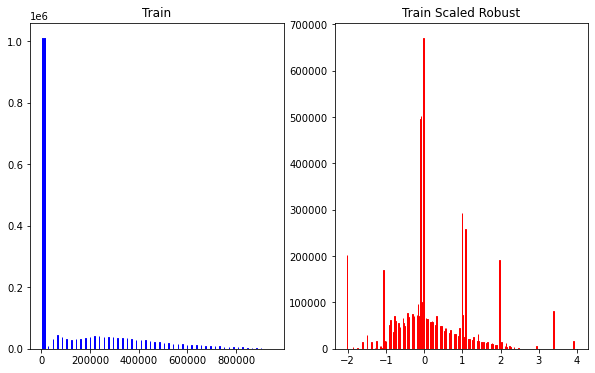

In [10]:
# visualize the data for train and train_scaled_rs
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_rs, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Robust')
plt.show()

Robust scaler is used to scale the data to a range of -1 to 1. It is used to handle outliers.An example of an outlier is a value that is much higher than the other values in the data.

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [11]:
# apply inverse transform on train_scaled_mm, train_scaled_sd, train_scaled_rs
train_scaled_mm_inv = scaler.inverse_transform(train_scaled_mm)
train_scaled_sd_inv = scaler.inverse_transform(train_scaled_sd)
train_scaled_rs_inv = scaler.inverse_transform(train_scaled_rs)

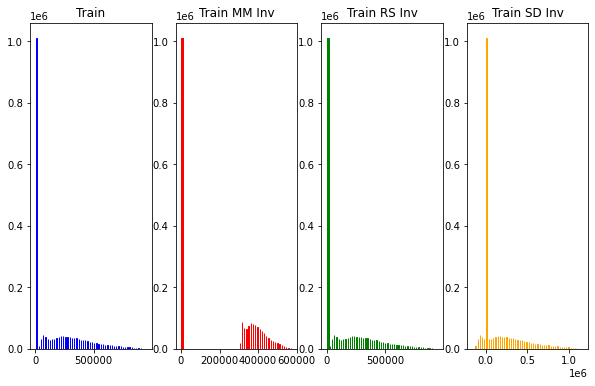

In [12]:
# visualize the data for train_scaled_mm_inv, train_scaled_sd_inv, train_scaled_rs_inv compared to train
plt.figure(figsize=(10, 6))
plt.subplot(1, 4, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 4, 2)
plt.hist(train_scaled_mm_inv, bins=50, ec='red', label='train_scaled_mm_inv')
plt.title('Train MM Inv')
plt.subplot(1, 4, 3)
plt.hist(train_scaled_rs_inv, bins=50, ec='green', label='train_scaled_rs_inv')
plt.title('Train RS Inv')
plt.subplot(1, 4, 4)
plt.hist(train_scaled_sd_inv, bins=50, ec='orange', label='train_scaled_sd_inv')
plt.title('Train SD Inv')
plt.show()

I noticed that the scaled data is not exactly the same as the original data. This is because the scaler scales the data to a range of 0 to 1. The inverse_transform method is used to scale the data back to the original range.

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [13]:
# utilize QuantileTransformer on df
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit_transform(train)
# apply QuantileTransformer on train, validate, test
train_scaled_qt = scaler.transform(train)
validate_scaled_qt = scaler.transform(validate)
test_scaled_qt = scaler.transform(test)

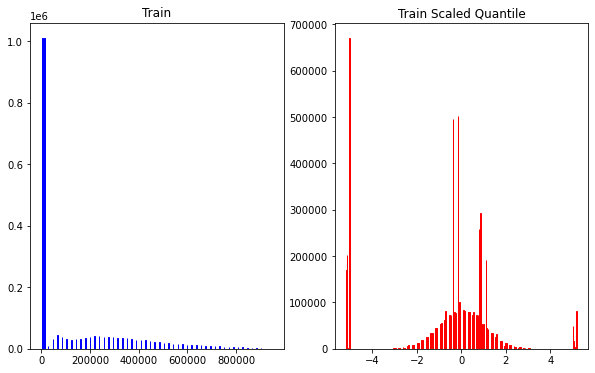

In [14]:
# visualize the data for train and train_scaled_qt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_qt, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Quantile')
plt.show()

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [15]:
# utilize QuantileTransformer on df but omit output_distribution
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit_transform(train)
# apply QuantileTransformer on train, validate, test
train_scaled_qt_no_dist = scaler.transform(train)
validate_scaled_qt_no_dist = scaler.transform(validate)
test_scaled_qt_no_dist = scaler.transform(test)

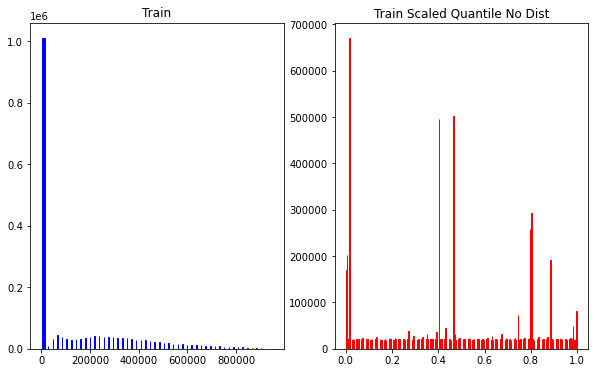

In [16]:
# visualize the data for train and train_scaled_qt_no_dist
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train, bins=50, ec='blue', label='train')
plt.title('Train')
plt.subplot(1, 2, 2)
plt.hist(train_scaled_qt_no_dist, bins=50, ec='red', label='train_scaled')
plt.title('Train Scaled Quantile No Dist')
plt.show()

I noticed that the QuantileTransformer with output_distribution=normal does not work as well due to outlies. The output_distribution argument is used to determine the distribution of the transformed data. If the output_distribution is not specified, the transformed data is assumed to be a Gaussian distribution. This is not the case for the output_distribution=normal.

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [17]:
# Create a function for prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of the data splits.
def standard_scaler(train, validate, test):
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train)
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    return train_scaled, validate_scaled, test_scaled

In [18]:
def min_max_scaler(train, validate, test):
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    return train_scaled, validate_scaled, test_scaled

In [19]:
def robust_scaler(train, validate, test):
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(train)
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    return train_scaled, validate_scaled, test_scaled